In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("spam_ham_dataset.csv")

In [6]:
print("Columns in dataset:", df.columns)
print(df.head())



Columns in dataset: Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [7]:
df = df.rename(columns={"text": "message", "label": "label"})

In [8]:
# Convert labels: spam=1, ham=0
df["label"] = df["label"].map({"ham": 0, "spam": 1})

In [9]:
print("\nDataset info:")
print(df["label"].value_counts())



Dataset info:
label
0    3672
1    1499
Name: count, dtype: int64


In [ ]:
# ---------------- Step 3: Text Vectorization ----------------
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [10]:
X = df["message"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}


In [13]:
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"✅ Accuracy of {name}: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔹 Training Logistic Regression...
✅ Accuracy of Logistic Regression: 0.9865
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       735
           1       0.97      0.99      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035


🔹 Training Naive Bayes...
✅ Accuracy of Naive Bayes: 0.9527
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       735
           1       0.90      0.94      0.92       300

    accuracy                           0.95      1035
   macro avg       0.94      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035


🔹 Training Random Forest...
✅ Accuracy of Random Forest: 0.9797
Classification Report:
               precision    recall  f1-score   support

           0    


🔹 Training Logistic Regression...
✅ Accuracy of Logistic Regression: 0.9865
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       735
           1       0.97      0.99      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035


🔹 Training Naive Bayes...
✅ Accuracy of Naive Bayes: 0.9527
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       735
           1       0.90      0.94      0.92       300

    accuracy                           0.95      1035
   macro avg       0.94      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035


🔹 Training Random Forest...
✅ Accuracy of Random Forest: 0.9797
Classification Report:
               precision    recall  f1-score   support

           0    

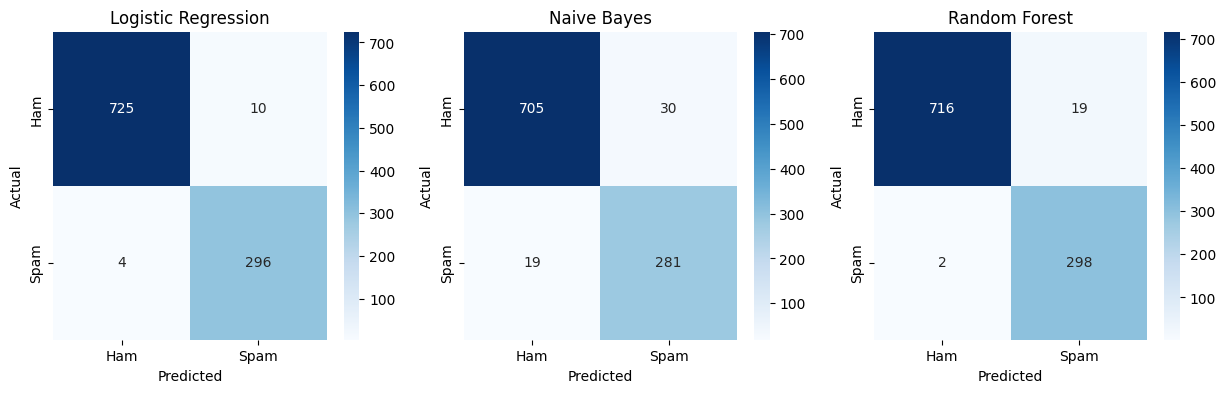

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))


for ax, (name, model) in zip(axes, models.items()):
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"✅ Accuracy of {name}: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix in subplots
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"], ax=ax)
    ax.set_title(f"{name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

In [23]:
sample_messages = [
        "Congratulations! You've won a $1000 Walmart gift card. Click here to claim.",
        "Hey, are we still on for dinner tonight?",
        "URGENT! Your mobile number has been selected for a prize.",
        "Let's finish the project by tomorrow morning."
    ]

In [24]:
sample_vec = vectorizer.transform(sample_messages)
sample_pred = model.predict(sample_vec)

print("🔮 Sample Predictions with", name)
for msg, pred in zip(sample_messages, sample_pred):
    print(f"Message: {msg}\nPrediction: {'Spam' if pred==1 else 'Ham'}\n")

🔮 Sample Predictions with Random Forest
Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim.
Prediction: Spam

Message: Hey, are we still on for dinner tonight?
Prediction: Spam

Message: URGENT! Your mobile number has been selected for a prize.
Prediction: Spam

Message: Let's finish the project by tomorrow morning.
Prediction: Ham

